# <center> Movie Review Sentiment Analysis </center>
## <center> Classify the sentiment of sentences from the Rotten Tomatoes dataset </center>

##  Contents

In today's lab, we are going to:
-  introduce the dataset (movie reviews with labels)
-  visualize the text data
-  preprocess text data
-  define and implement deep Learning models:  LSTM, GRU, Bi-directionnal RNN, CNN
-  implement baselines (classic preprocessing and ML algorithms): this part should come first but is less relevant for today !
      
---

* [0. Introduction](#introduction)
* [1. Exploratory Data Analysis](#eda)
* [2. Preprocessing the data](#preprocessing)
* [3. Deep Learning Algorithms](#DL)
  *  [3.1 LSTM model](#lstm)
  *  [3.2 GRU model ](#gru)
  *  [3.3 Bidirectional-GRU model](#bgru)
  *  [3.4 CNN model ](#cnn)
* [4. Machine Learning Models without RNN (baselines)](#ml)
  * [4.0 Example](#example)
  * [4.1 Preprocessing the data](#preprocessing_tfidf)
  * [4.2 Train classical ML algorithms on a vectorized data set](#ml_algo)

---


<a id='introduction'></a>
## 0. Introduction 

From https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/overview/description


The Rotten Tomatoes movie review dataset is a corpus of movie reviews used for sentiment analysis, originally collected by Pang and Lee [1]. In their work on sentiment treebanks, Socher et al. [2] used Amazon's Mechanical Turk to create fine-grained labels for all parsed phrases in the corpus. This competition presents a chance to benchmark your sentiment-analysis ideas on the Rotten Tomatoes dataset. You are asked to label phrases on a scale of five values: negative, somewhat negative, neutral, somewhat positive, positive. Obstacles like sentence negation, sarcasm, terseness, language ambiguity, and many others make this task very challenging.




![treebank.png](treebank.png)



More on the sentiment treebank https://nlp.stanford.edu/sentiment/treebank.html

You can also find more technical information by looking at these papers: 
- How do you predict the label of each node given a tree https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf
- How do you extract a tree from a given sentence https://nlp.stanford.edu/~manning/papers/unlexicalized-parsing.pdf

For now, just assume that the tree structure is given and that each node is labelled manually. 

In [4]:
# imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import requests
exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)
npt_config = {
    'session_name': 'Lab5-Map545',
    'session_owner': 'aymeric',
    'sender_name': input("Your name:"),
}
send('start', 0)  

Your name:Erwan


<Response [200]>

<a id='eda'></a>
## 1. Exploratory Data Analysis 

First, we going to import the data and plot them in order to understand the specificity of the data set. The following code import the data. 

In [6]:
#The following code list the files in the directory 'input'
PATH = 'input/'
print("The files in the directory 'input' are", os.listdir(PATH))

# Import the train, test and submission data set
train = pd.read_csv('input/train.tsv', sep = '\t')

The files in the directory 'input' are ['sampleSubmission.csv', 'test.tsv', 'train.tsv']


**1) Print the first rows of the training data set. What is the difference between PhraseId and SentenceId?**

In [8]:
### TODO BLOCK

train.head(20)

# Accessing the names of the columns
#train.columns

# Each sentence is decomposed into smaller parts, called Phrases. The SentenceId is the number of the full sentence 
# and the PhraseId is the number of a small part of the full sentence. 

### END TODO BLOCK

#send('Your answer', 1)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


The sentiment labels are:
- 0 - negative
- 1 - somewhat negative
- 2 - neutral
- 3 - somewhat positive
- 4 - positive.

**2) Print the full sentence for the first element in the training set. Is it a positive review in your opinion ?**

In [9]:
### TODO BLOCK

labels = ["negative", "somewhat negative", "neutral", "somewhat positive", "positive"]
print("The first full sentence of the training set is: \n", train.Phrase[0])
print("The label of this full sentence is", labels[train.Sentiment[0]] )

### END TODO BLOCK

send('Your answer', 2)

The first full sentence of the training set is: 
 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
The label of this full sentence is somewhat negative


<Response [200]>

**3) Print all subphrases of the first sentence together with their labels.**

In [10]:
### TODO BLOCK

a = train[train.SentenceId==1]
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
a

### END TODO BLOCK

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what is good for the goose,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is good for the goose,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for the goose,2


**4) How many subphrases are in the data set? How many original reviews?**

In [11]:
### TODO BLOCK

print("The number of subphrases is equal to the number of rows in the data set, which is", train.shape[0])
print("The number of original reviews in the data set is equal to the number of Id of sentences, which is",
      train.SentenceId.nunique())
#Beware, some SentenceId are missing. Therefore, the maximum SentenceId does not correspond to the number of Sentences
print("Maximum SentenceId", np.max(train.SentenceId))

### END TODO BLOCK

send('There are ... subphrases and ... original reviews', 3)

The number of subphrases is equal to the number of rows in the data set, which is 156060
The number of original reviews in the data set is equal to the number of Id of sentences, which is 8529
Maximum SentenceId 8544


<Response [200]>

**5) How are the labels distributed in the training set?**

Text(0, 0.5, 'Number of reviews ')

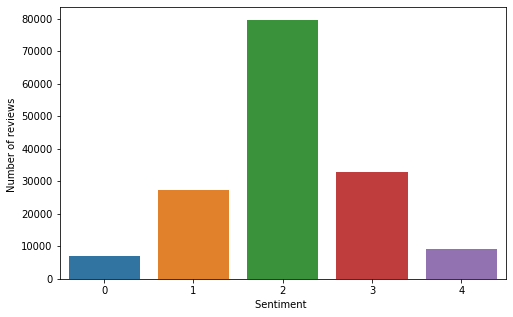

In [12]:
### TODO BLOCK

class_count = train['Sentiment'].value_counts()
class_count

x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8, 5))
sns.barplot(x, y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

### END TODO BLOCK

We are going to print Word Clouds. To do so, you need to install the wordcloud package here: 
https://github.com/amueller/word_cloud

If you are interested, you can find additional information on the package here: 
https://peekaboo-vision.blogspot.com/2012/11/a-wordcloud-in-python.html

**6) Use the following code to print the most frequent words of the whole training set and the most fraquent words in each class/sentiment. Any comments?**

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1  # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    send(plt, 4)
    plt.imshow(wordcloud)
    plt.show()
    

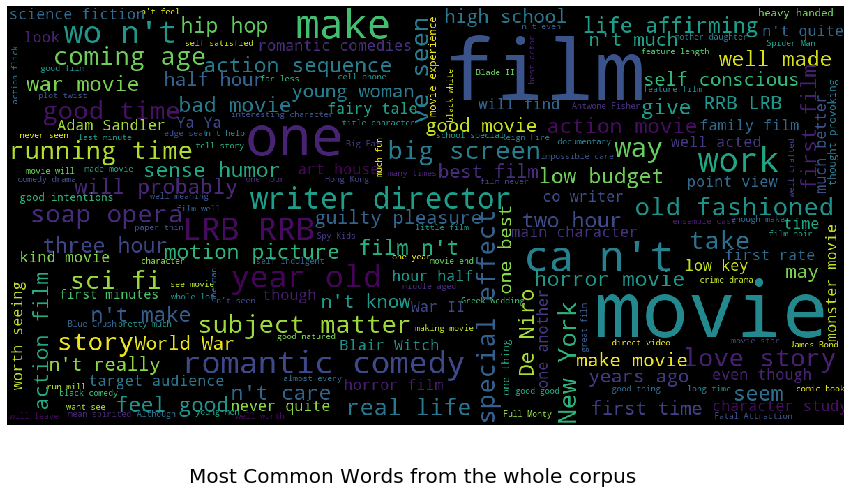

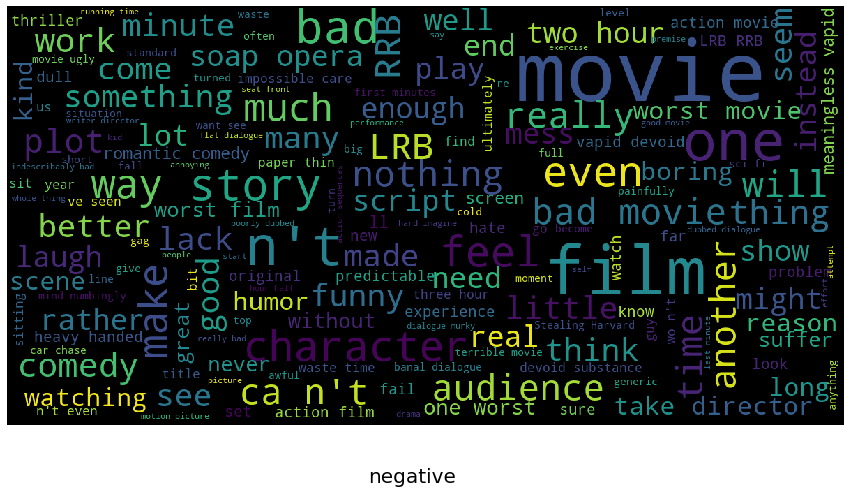

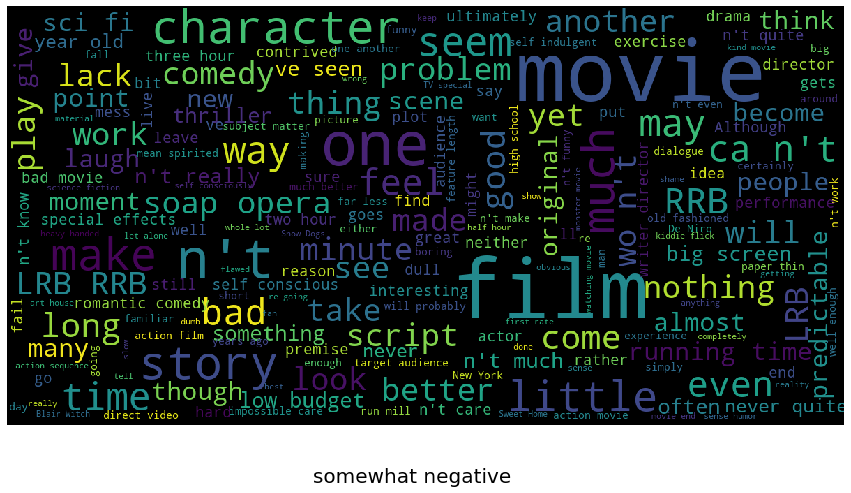

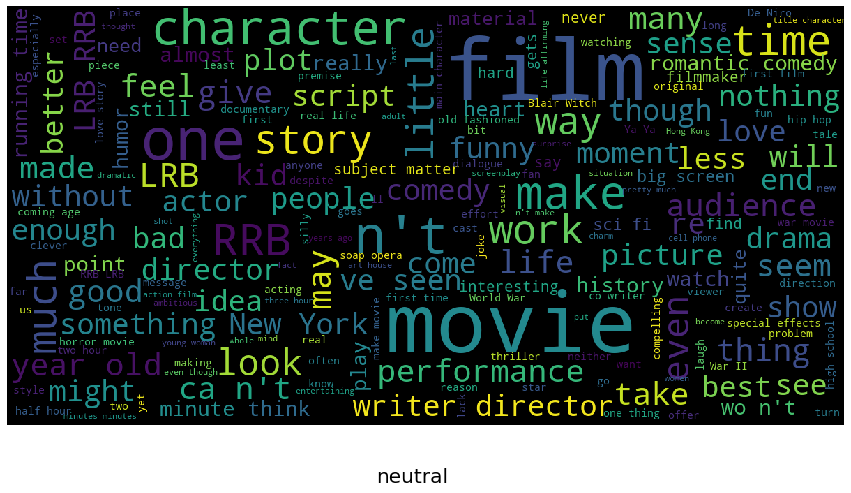

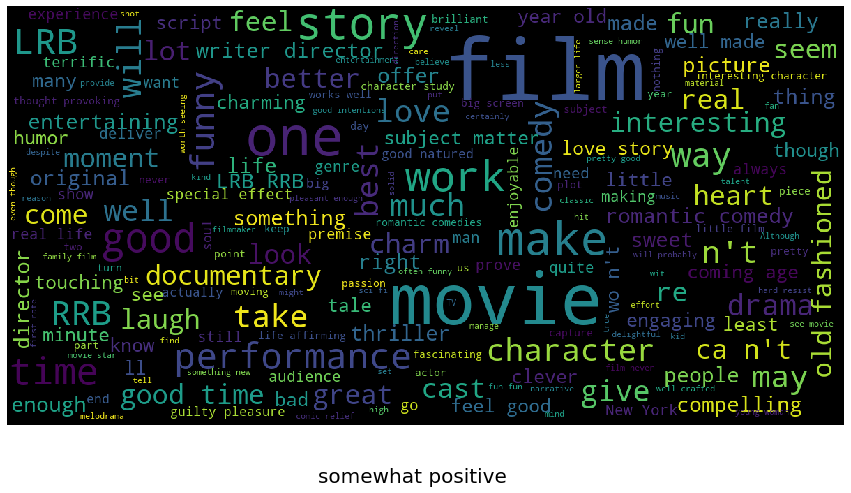

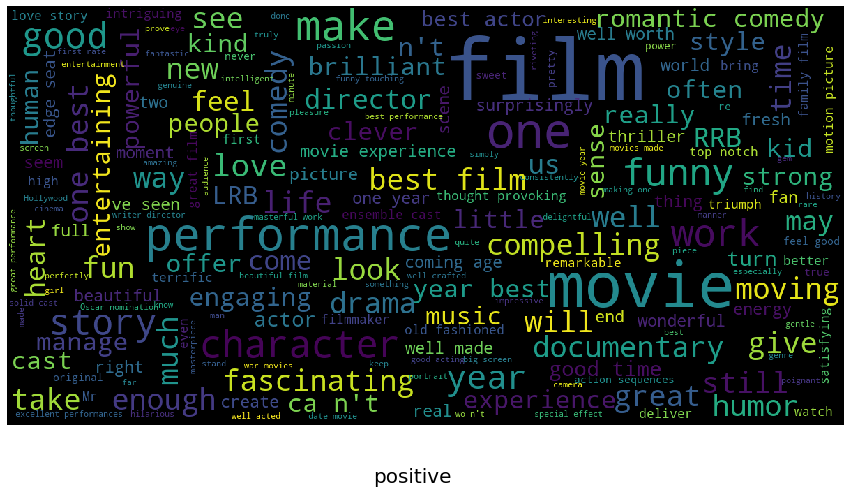

In [14]:
### TODO BLOCK

show_wordcloud(train['Phrase'], 'Most Common Words from the whole corpus')
show_wordcloud(train[train.Sentiment == 0]['Phrase'], labels[0])
show_wordcloud(train[train.Sentiment == 1]['Phrase'], labels[1])
show_wordcloud(train[train.Sentiment == 2]['Phrase'], labels[2])
show_wordcloud(train[train.Sentiment == 3]['Phrase'], labels[3])
show_wordcloud(train[train.Sentiment == 4]['Phrase'], labels[4])

### END TODO BLOCK

##  2. Preprocessing 
<a id='preprocessing'></a>


Working with NLP datasets (reviews, captions, etc.) typically involves an important preprocessing of the data. 
When working with images, the observations are naturally transformed into arrays (of size number of pixels * 3) with numerical values (in [0;255] for example). The preprocessing part is often very important for natural language datasets. As we are not dealing with quantitative variables but with words in a vocabulary, we need to be careful.

**You should not spend more than 20 minutes on this part** All the details are given, and many visualizations are provided, so that you can come back afterwards to understand with more details.

We have the following steps:
- 2.1 - Create a train and a validation set from the original training set.
- 2.2 - Transform the labels into categories.
- 2.3 - Transform the lists of sentences into an array:
  - Each word is mapped to a number. 
  - Lists of numbers are padded with 0 or truncated to fit in an array

###  2.1 Create a train and a validation set from the original training set.

The original test set that we imported does not contain labels. We are going to split the training set into a training set and a validation set. Both of them will contain labels. 

**7) To what problem do we need to pay a particular attention when we split the training set?**

 ## HIDE CELL
The rows of the data set are not independent: they are subparts of some sentences. We thus need to put different **sentences** into the train and validation set: for a sentence, all phrases derived from this sentence will be put together. 

**8) Split the training set into a training set (80% of the data) and a validation set (20% of the data). You may take advantage of the functions 'isin'  and 'train_test_split' from 'sklearn.model_selection'.**

In [35]:
### TODO BLOCK

from sklearn.model_selection import train_test_split

#Create the indices of the sentence for the training and validation set
Sent_train, Sent_val = train_test_split(train.SentenceId.unique(), test_size=0.20)

#If you want to test the code with a smaller data set, you can try instead of the previous line
#Sent_train, Sent_val = train_test_split(train.SentenceId.unique()[0:10], test_size=0.20)

X_train = train.Phrase[train.SentenceId.isin(Sent_train)]
X_val = train.Phrase[train.SentenceId.isin(Sent_val)]
Y_train = train.Sentiment[train.SentenceId.isin(Sent_train)]
Y_val = train.Sentiment[train.SentenceId.isin(Sent_val)]

### END TODO BLOCK
send(np.array(X_train[1:10]), 5)

<Response [200]>

###  2.2 Transform the labels into categories.

**9) Transform the target into a one-hot encoded vector. You can use the function to_categorical from keras.utils.**

In [36]:
### TODO BLOCK

from keras.utils import to_categorical
Y_train = to_categorical(Y_train.values) 
Y_val = to_categorical(Y_val.values) #TODO
Y_train

### END TODO BLOCK

#send(Y_train[0:10], 6)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### 2.3 Transform the lists of sentences into an array

In the following, we tokenize the train and test set.

**10) Understand the following cell. You can look at https://keras.io/preprocessing/text/**

In [37]:
max_features = 13000
num_classes = 5

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val   = tokenizer.texts_to_sequences(X_val)
type(X_train)

list

In [39]:
### TODO BLOCK

# The function 'tokenizer' maps each word of a sentence into an integer. It thus turns a sentence into a sequence of 
# integers. See for example the correspondance for the first sentence in the data set. 

#print(X_train[0])
#print(train.Phrase[0])

# You can also check the correspondance to the sentence using the ```word_index``` command. 

tokenizer.word_index

# The words are sorted by number of occurences. The most frequent words are associated to the smallest integers. 

#tokenizer.word_counts

# END TODO BLOCK

#send('Write here the explanation to the previous code', 7)

{'the': 1,
 'a': 2,
 'of': 3,
 'and': 4,
 'to': 5,
 "'s": 6,
 'in': 7,
 'is': 8,
 'that': 9,
 'it': 10,
 'as': 11,
 'with': 12,
 'for': 13,
 'its': 14,
 'film': 15,
 'movie': 16,
 'an': 17,
 'this': 18,
 'but': 19,
 'be': 20,
 'you': 21,
 'on': 22,
 "n't": 23,
 'by': 24,
 'one': 25,
 'more': 26,
 'his': 27,
 'at': 28,
 'about': 29,
 'than': 30,
 'not': 31,
 'or': 32,
 'from': 33,
 'all': 34,
 'have': 35,
 'like': 36,
 'are': 37,
 'has': 38,
 "'": 39,
 'so': 40,
 'out': 41,
 'story': 42,
 'rrb': 43,
 'up': 44,
 'who': 45,
 'into': 46,
 'good': 47,
 'too': 48,
 'most': 49,
 'lrb': 50,
 'if': 51,
 'what': 52,
 "''": 53,
 'no': 54,
 'time': 55,
 'their': 56,
 'i': 57,
 'comedy': 58,
 'characters': 59,
 'your': 60,
 'much': 61,
 'some': 62,
 'can': 63,
 'just': 64,
 'does': 65,
 'life': 66,
 'even': 67,
 'little': 68,
 'funny': 69,
 'will': 70,
 'well': 71,
 'way': 72,
 'been': 73,
 'any': 74,
 'only': 75,
 'which': 76,
 'do': 77,
 'very': 78,
 'make': 79,
 'director': 80,
 'old': 81,
 'own

In [40]:
#Note that the length of the sentences varies. 

#for i in range (10):
#    print(len(X_train[i]))
    
#In order to limit the influence of the length on the predictions,
# we pad sequences. The length of the sentences, after transformation, will be 50. 

from keras.preprocessing.sequence import pad_sequences
max_words=50

X_train = pad_sequences(X_train, maxlen=max_words)
X_val = pad_sequences(X_val, maxlen=max_words)

**11) What is the transformation operated on sentences that contain less than 50 words? You can look at https://keras.io/preprocessing/sequence/**

In [41]:
### TODO BLOCK

# Sentences that contain less than 50 words are padded with zeros in order to contain 50 elements/words. 
# Beware, the extra zeros are added in the first elements of the vector. 

X_train[0]

### END TODO BLOCK

send('Your answer', 8)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     2,   336,     3,
       12528,  7002,     1,  5588,     9,    52,     8,    47,    13,
           1,  2390,     8,   191,    47,    13,     1,  9525,    62,
           3,    76,   638,  8777,    19,   547,     3,    76,  2341,
           5,    61,     3,     2,    42])

**12) Before starting implementing RNN, make sure you understand what type of data we are dealing with:**
- What is X_train, y_train?
- What are their respective sizes?
- Are the values floats, integers? What do they correspond to?
- Have we preserved the order of the sequence ?

In [105]:
send('Your answer', 9)
send('Your answer', 10)
send('Your answer', 11)
send('Your answer', 12)

<Response [200]>

---
<a id='DL'></a>
# 3. Deep Learning algorithms

The goal of this part is to implement the following Recurrent Neural Networks: 
- based on LSTM
- based on GRU
- based on Bi-directional GRU
- based on CNN

For convenience, we use keras. https://towardsdatascience.com/keras-vs-pytorch-for-deep-learning-a013cb63870d


<a id='lstm'></a>
## 3.1 LSTM


The first neural network we consider uses LSTM.
See [Understanding LSTM Networks -- colah's blog](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) for an excellent description of LSTM.

In [23]:
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM,Embedding
from keras.optimizers import Adam
from keras.layers import SpatialDropout1D,Dropout,Bidirectional,Conv1D,GlobalMaxPooling1D,MaxPooling1D,Flatten
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

**13) Create the 'model_LSTM' model with the following layers:**
- an Embedding layer (Turns positive integers (indexes) into dense vectors of fixed size see https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work)
  - how many words at most can we embed (first argument)
  - we embed those words in dimension 100 (arbitrary choice, often "enough")
  - use mask_zero=True
- an LSTM layer:
  - with 64 units, 
  - dropout of 0.5, 
  - return_sequences=True
- an LSTM layer:
  - with 32 units, 
  - dropout of 0.5, 
  - return_sequences=False
- a dense Layer :
  - what should be the dimension of the output?
  - what should be the activation?

In [24]:
### TODO BLOCK

model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 100, mask_zero=True))  
model_LSTM.add(LSTM(64, dropout=0.4, return_sequences=True))  
model_LSTM.add(LSTM(32, dropout=0.5, return_sequences=False)) 
model_LSTM.add(Dense(num_classes, activation='softmax'))     

### END TODO BLOCK

C:\Users\Erwan\Anaconda3\lib\site-packages\keras\layers\recurrent.py:2208: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '
C:\Users\Erwan\Anaconda3\lib\site-packages\keras\layers\recurrent.py:2208: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


We use: 
- the categorical cross entropy for the loss
- Adam optimizer with learning rate  0.001
- accuracy for the metrics

**14) Compile the previous model and print the summary of the model.**

In [25]:
### TODO BLOCK

model_LSTM.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])

model_LSTM.summary()

### END TODO BLOCK

send(model_LSTM.summary(), 13)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          42240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,354,821
Trainable params: 1,354,821
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1300000   
______________________

<Response [400]>

**15) Fit the model using nb_epochs=2 and batch_size = 128.**

In [30]:
### TODO BLOCK

batch_size = 128
epochs = 2

history3=model_LSTM.fit(X_train[1:1000], Y_train[1:1000], validation_data=(X_val[1:1000], Y_val[1:1000]),
                        epochs=epochs,
                         batch_size=batch_size, verbose=1)

### END TODO BLOCK

INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock


Train on 999 samples, validate on 999 samples
Epoch 1/1
999/999 [==============================] - 15s 15ms/step - loss: 1.5948 - accuracy: 0.5816 - val_loss: 1.5839 - val_accuracy: 0.5495


**16) Answer the following questions**
- What is the final accuracy of the model?
- How is this accuracy defined ?
- Do you think we can hope that the model accuracy can reach 100% ?

In [ ]:
send('Your answer', 14)
send('Your answer', 15)
send('Your answer', 16)

<a id='gru'></a>
## 3.2 GRU

We now do the same operations again using a GRU unit instead of the LSTM unit. All the rest of the architecture remains unchanged.

**17) Create a GRU architecture, compile the model and fit it to the data.**

You can try with loss ```categorical_crossentropy``` or ```binary_crossentropy```
(look at this to see what is best https://stackoverflow.com/questions/46354182/why-does-binary-accuracy-give-high-accuracy-while-categorical-accuracy-give-low )

In [42]:
### TODO BLOCK 

model_GRU=Sequential()
model_GRU.add(Embedding(max_features,100,mask_zero=True))
model_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model_GRU.add(Dense(num_classes,activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model_GRU.summary()

#%%time
history1=model_GRU.fit(X_train[1:1000], Y_train[1:1000], 
                       validation_data=(X_val[1:1000], Y_val[1:1000]),epochs=epochs, 
                       batch_size=batch_size, verbose=1)

### END TODO BLOCK

C:\Users\Erwan\Anaconda3\lib\site-packages\keras\layers\recurrent.py:1652: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         1300000   
_________________________________________________________________
gru_1 (GRU)                  (None, None, 64)          31680     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 1,341,157
Trainable params: 1,341,157
Non-trainable params: 0
_________________________________________________________________


INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock
INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock


Train on 999 samples, validate on 999 samples
Epoch 1/1
999/999 [==============================] - 8s 8ms/step - loss: 1.5905 - accuracy: 0.5075 - val_loss: 1.5698 - val_accuracy: 0.6226


**18) Answer the following questions**
- What is the final accuracy of the model?
- Is there a difference between LSTM and GRU?

- Record the training time: go back and change the X_train:
  - divide the number of sentences by 2
OR  
  - change the length of the sequences to 200 instead of 50.
What happens ?


In [ ]:
send('Your answer', 17)
send('Your answer', 18)
send('Your answer', 19)

In [ ]:
### TODO BLOCK

model2_GRU=Sequential()
model2_GRU.add(Embedding(max_features,100,mask_zero=True))
model2_GRU.add(GRU(64,dropout=0.4,return_sequences=True))
model2_GRU.add(GRU(32,dropout=0.5,return_sequences=False))
model2_GRU.add(Dense(num_classes,activation='softmax'))
model2_GRU.compile(loss='categorical_crossentropy',optimizer=Adam(lr = 0.001),metrics=['accuracy'])
model2_GRU.summary()

history2=model2_GRU.fit(X_train, Y_train, 
                        validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

### END TODO BLOCK

<a id='bgru'></a>
## 3.3 Bidirectional-GRU

We now do the same operations again using a Bidirectional GRU unit instead of the LSTM unit. All the rest of the architecture remains unchanged.

**19) Create a GRU model named 'model_BGRU', compile it and fit it to the data.**

In [44]:
### TODO BLOCK

model_BGRU = Sequential()
model_BGRU.add(Embedding(max_features, 100, input_length=max_words))
model_BGRU.add(SpatialDropout1D(0.25))
model_BGRU.add(Bidirectional(GRU(64,dropout=0.4,return_sequences = True)))
model_BGRU.add(Bidirectional(GRU(32,dropout=0.5,return_sequences = False)))
model_BGRU.add(Dense(5, activation='softmax'))
model_BGRU.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_BGRU.summary()

history4=model_BGRU.fit(X_train[1:1000], Y_train[1:1000], 
                         validation_data=(X_val[1:1000], Y_val[1:1000]),
                        epochs=epochs, batch_size=batch_size, verbose=1)

### END TODO BLOCK

send(model_BGRU.summary(), 20)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 128)           63360     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                30912     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
Total params: 1,394,597
Trainable params: 1,394,597
Non-trainable params: 0
_________________________________________________________________


INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock


Train on 999 samples, validate on 999 samples
Epoch 1/1
999/999 [==============================] - 12s 12ms/step - loss: 1.4779 - accuracy: 0.5686 - val_loss: 1.2885 - val_accuracy: 0.6226
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 128)           63360     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                30912     
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 325       
Total params: 1,394,597
Trainable params: 1,394,597
Non-trainab

<Response [400]>

<a id='cnn'></a>
## 3.4 CNN

Finally, you can also compare to the CNN model below.

**20) Create a CNN model, called 'model_CNN', compile it and fit it to the data.**

In [45]:
### TODO BLOCK

model_CNN= Sequential()
model_CNN.add(Embedding(max_features,100,input_length=max_words))
model_CNN.add(Dropout(0.2))
model_CNN.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(128,activation='relu'))
model_CNN.add(Dropout(0.2))
model_CNN.add(Dense(num_classes,activation='softmax'))
model_CNN.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model_CNN.summary()

early_stop = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)

history5=model_CNN.fit(X_train, Y_train, 
                validation_data=(X_val, Y_val),epochs=3, batch_size=batch_size, 
                        verbose=1,callbacks = [early_stop])

### END TODO BLOCK

send(model_CNN.summary(), 21)

INFO (theano.gof.compilelock): Refreshing lock C:\Users\Erwan\AppData\Local\Theano\compiledir_Windows-10-10.0.19041-SP0-Intel64_Family_6_Model_78_Stepping_3_GenuineIntel-3.7.4-64\lock_dir\lock


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 50, 100)           1300000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 50, 64)            19264     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                

<Response [400]>

<a id='ml'></a>
# 4. Machine Learning Models without RNN (baselines) 

We are going to use the Natural Language Toolkit NLTK package https://www.nltk.org/

``NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for 
- classification
- tokenization
- stemming
- tagging 
- parsing
- semantic reasoning
- wrappers for industrial-strength NLP libraries
- etc.

<a id='example'></a>
## 4.0 Example on a tiny corpus

A first idea to vectorize the word can be to count the number of occurrences of each word in the corpus. To understand the benefits and drawbacks of this method, let us look at a very simple/small data set. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

corpus = [
    'This is the first document.',
    'The document is the second document!!!',
    'And this is the third one on Patagonia.',
    'Is this the first doCUmENT?',
]

counter = CountVectorizer()
X_count = counter.fit_transform(corpus).todense()


print(counter.get_feature_names(), '\n')
print(X_count, '\n')

print(sum(X_count))

**21) Comment on the results.**

In [ ]:
### TODO BLOCK

print("All punctuation marks are removed. The order of the words in the", 
      "sentence has obviously no impact in the count.") 

i = np.argmax(np.sum(X_count,0))
most_frequent_word = counter.get_feature_names()[i]

print("The most frequent word in the corpus is", most_frequent_word, 
      "which is clearly not relevant to understand the corpus.")

### END TODO BLOCK

send('Your answer', 22)

Counting the number of words is clearly not satisfying. Instead of a simple count, we use de **TFIDF** transform: it computes a kind of **relative importance of words**. You can look at:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://en.wikipedia.org/wiki/Tf%E2%80%93idf

The following code implement the TFIDF transformation.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names(), '\n')
print(X.todense())

**22) What is the format of X after the fit.transform operation? Do you prefer WordCount or TFIDF?**

In [ ]:
### TODO BLOCK

print(type(X))

# X is a sparse matrix: since it contains many zeros it is better to store X has a sparse matrix, from a
# computational and memory point of view.  

most_frequent_word = vectorizer.get_feature_names()[np.argmax(np.sum(X,0))]

print("The most important word with the TFIDF transformatio is", most_frequent_word, 
      "which is clearly more relevant than the one obtained with counting the words.")

### END TODO BLOCK

send('Your answer', 23)

You can do the same operation but considering bigrams instead of onegram (a single word). The following code implement TF-IDF for bigrams. 

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus)

#List of all bigrams
print(vectorizer.get_feature_names(), '\n')
#print(X.todense().shape)

#The most frequent onegram/bigram
most_frequent_word = vectorizer.get_feature_names()[np.argmax(np.sum(X,0))]
print("The most important word with the TFIDF transformation is", most_frequent_word,".")

<a id='preprocessing_tfidf'></a>
## 4.1 Preprocessing of the data

Now that we have compared WordCount and TF-IDF transformation, we can go back to our original data set. We first need to vectorize the training vectors:
- we start by dividing the data set into a training set and a validation set
- we fit the tokenizer on the training set and apply it on the validation set using n-grams (only  uni-grams and bi-grams, see https://en.wikipedia.org/wiki/N-gram) and TFIDF metric

**23) Split the data set and apply the tokenization described just above.**

In [ ]:
### TODO BLOCK

#Create the indices of the sentence for the training and validation set
Sent_train, Sent_val = train_test_split(train.SentenceId.unique(), test_size=0.20)

#If you want to test the code with a smaller data set, you can try instead of the previous line
#Sent_train, Sent_val = train_test_split(train.SentenceId.unique()[0:10], test_size=0.20)

X_train = train.Phrase[train.SentenceId.isin(Sent_train)]
X_val = train.Phrase[train.SentenceId.isin(Sent_val)]
Y_train = train.Sentiment[train.SentenceId.isin(Sent_train)]
Y_val = train.Sentiment[train.SentenceId.isin(Sent_val)]

#Fit the tokenizer on the training set
# A more complicated version using a tokenizer built for tweets
#from nltk.tokenize import TweetTokenizer
#tokenizer = TweetTokenizer()
#np.set_printoptions(precision=2)
#vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)

vectorizer = TfidfVectorizer(ngram_range=(1, 1))
training_text = list(X_train.values)
vectorizer.fit(training_text)
train_vectorized = vectorizer.transform(training_text)

validation_text = list(X_val.values)
val_vectorized = vectorizer.transform(validation_text)

### END TODO BLOCK

**23) How many n_grams are in the training set?**

In [ ]:
### TODO BLOCK

print(len(vectorizer.get_feature_names()), '\n')

### END TODO BLOCK

send('Your answer', 24)

<a id='ml_algo'></a>
## 4.2 Train classical ML algorithms on a vectorized data set

**24) Train a Logistic Regression model and a SVM on the previous (preprocessed) data.**

In [ ]:
### TODO BLOCK

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
ovr = OneVsRestClassifier(lr)
ovr.fit(train_vectorized,Y_train)
print(classification_report(ovr.predict(val_vectorized) , Y_val))
print(accuracy_score(ovr.predict(val_vectorized) , Y_val ))

### END TODO BLOCK

send('The accuracy of logistic regression is ...', 25)

In [ ]:
### TODO BLOCK

svm = LinearSVC()
svm.fit(train_vectorized,Y_train)
print(classification_report( svm.predict(val_vectorized) , Y_val))
print(accuracy_score( svm.predict(val_vectorized) , Y_val ))

### END TODO BLOCK

send('The accuracy of svm is...', 26)

In [ ]:
### HIDE CELL

from sklearn.ensemble import VotingClassifier
estimators = [ ('svm',svm) , ('ovr' , ovr) ]
clf = VotingClassifier(estimators , voting='hard')
clf.fit(train_vectorized,Y_train)
print(classification_report( clf.predict(val_vectorized) , Y_val))
print(accuracy_score( clf.predict(val_vectorized) , Y_val ))

This notebook is adapted on Parth Rohilla's work, available at  https://www.kaggle.com/parth05rohilla/kernels